# Second stage of preprocessing satellite data

Satellite data needs to be transformed from Matlab format to table (pandas DataFrame). 
- The first step is a combination of variables into DataFrame with arrays in WWLLN column. This is done beforehand.
- The second step is transformation of WWLLN array to 14 WWLLN variables. This stage is described in the notebook.

In [1]:
import numpy as np
import pandas as pd

## Loading data

In [13]:
df_raw = pd.read_parquet('F:/2024_Lightning_Analysis/FY-2E_data/data_extracted/around_station_small.parquet')

In [3]:
print(df_raw.shape)

(11852748, 25)


In [4]:
df_raw.head(6)

,File_Name,Cloud_Number,Area,Center_lonlat_1,Eccentricity,Orientation,TBBmax,TBBmean,TBBmedian,TBBmin,...,Minute,Second,Latitude,Longitude,Error of location,Number of discharges,Number of day,Lightning is in cloud,Lightning is in ellipse,TBB near lightning
0,20180629_1330,1,25944.338784,81.096016,64.625221,0.779131,-79.610222,-32.214001,-35.967220,-35.725994,...,41.0,13.119602,64.0334,81.6600,5.5,5.0,737240.570291,1.0,1.0,-37.432003
1,20180629_1330,1,25944.338784,81.096016,64.625221,0.779131,-79.610222,-32.214001,-35.967220,-35.725994,...,41.0,13.119526,63.7694,81.5713,7.5,6.0,737240.570291,0.0,1.0,-34.529995
2,20180629_1330,2,320901.907356,37.586788,64.947525,0.845030,-38.133324,-31.087002,-40.097527,-40.195995,...,5.0,44.713015,63.8807,37.9088,4.2,7.0,737240.545656,0.0,1.0,-44.730007
3,20180629_1330,2,320901.907356,37.586788,64.947525,0.845030,-38.133324,-31.087002,-40.097527,-40.195995,...,6.0,7.180297,62.4835,36.5488,12.9,10.0,737240.545916,1.0,1.0,-45.566006
4,20180629_1330,2,320901.907356,37.586788,64.947525,0.845030,-38.133324,-31.087002,-40.097527,-40.195995,...,6.0,27.577583,63.3072,31.6227,17.6,7.0,737240.546153,1.0,1.0,-38.673000
5,20180629_1330,2,320901.907356,37.586788,64.947525,0.845030,-38.133324,-31.087002,-40.097527,-40.195995,...,6.0,39.093093,63.1316,35.4268,11.2,5.0,737240.546286,1.0,1.0,-45.566006


In [35]:
df_raw.tail(6)

,File_Name,Cloud_Number,Area,Center_lonlat_1,Eccentricity,Orientation,TBBmax,TBBmean,TBBmedian,TBBmin,...,Minute,Second,Latitude,Longitude,Error of location,Number of discharges,Number of day,Lightning is in cloud,Lightning is in ellipse,TBB near lightning
657093,20180103_1930,5990,837.978978,44.052376,-18.654289,0.934884,-53.417923,-32.029995,-44.721828,-45.498501,...,38.0,52.311108,-18.6088,43.9812,10.9,5.0,737063.818661,0.0,1.0,-51.271999
657094,20180103_1930,5990,837.978978,44.052376,-18.654289,0.934884,-53.417923,-32.029995,-44.721828,-45.498501,...,40.0,55.052899,-18.5256,44.1762,13.9,6.0,737063.820082,0.0,1.0,-37.169003
657095,20180103_1930,5990,837.978978,44.052376,-18.654289,0.934884,-53.417923,-32.029995,-44.721828,-45.498501,...,47.0,57.187443,-18.5102,44.2318,14.1,6.0,737063.824967,0.0,1.0,-32.029995
657096,20180103_1930,5991,444.055178,73.096878,-25.858814,0.760492,2.677390,-32.029995,-34.114071,-33.832500,...,24.0,39.255217,-25.8259,72.9891,9.0,7.0,737063.808788,0.0,1.0,-34.240993
657097,20180103_1930,5991,444.055178,73.096878,-25.858814,0.760492,2.677390,-32.029995,-34.114071,-33.832500,...,24.0,39.255221,-25.9135,73.0154,20.7,5.0,737063.808788,0.0,1.0,-35.902004
657098,20180103_1930,5991,444.055178,73.096878,-25.858814,0.760492,2.677390,-32.029995,-34.114071,-33.832500,...,27.0,28.186974,-25.8836,72.9547,21.6,10.0,737063.810743,0.0,1.0,-33.424007


## Ploting global distribution of Centers of Clouds

In [29]:
# Define the coordinates of the station (center) and the tolerance for the rectangle (in degrees)
station_latitude = 40.4713
station_longitude = 44.1819
frame_tolerance = 10  # Adjust this value as needed for the ±N degree range
rectangle_tolerance = 5  # ±1 degree for the rectangle

# Define the bounding box
min_latitude = station_latitude - frame_tolerance
max_latitude = station_latitude + frame_tolerance
min_longitude = station_longitude - frame_tolerance
max_longitude = station_longitude + frame_tolerance

In [31]:
import plotly.express as px
import plotly.graph_objects as go

def plot_cloud_centers_with_station(df, station_latitude, station_longitude, frame_half_size, rectangle_half_size):
    """
    Plots cloud centers with a station marker and a rectangular region around the station.
    
    Parameters:
    - df: The DataFrame containing the cloud data with 'Center_lonlat_1' for longitude and 'Center_lonlat_2' for latitude.
    - station_latitude: Latitude of the station to plot.
    - station_longitude: Longitude of the station to plot.
    - frame_half_size: Half the size of the frame window (± in degrees) around the station to zoom in on. Default is 5 degrees.
    - rectangle_half_size: Half the size of the rectangle (± in degrees) to plot around the station. Default is 1 degree.
    """
    
    # Create a scatter plot with cloud centers using scatter_geo
    fig = px.scatter_geo(
        df,
        lat='Center_lonlat_2',  # Use Center_lonlat_2 for latitude
        lon='Center_lonlat_1',  # Use Center_lonlat_1 for longitude
        title="Centers of Clouds",
        height=800,  # Increase height for better resolution
        width=1200,  # Increase width for better resolution
    )

    # Update marker size and layout
    fig.update_traces(
        marker=dict(size=2),  # Make markers smaller by adjusting size
    )

    # Add the station's marker (red dot, 10 times smaller than before)
    fig.add_trace(go.Scattergeo(
        lat=[station_latitude],
        lon=[station_longitude],
        mode='markers',
        marker=dict(size=4, color='red'),  # Smaller marker for the station
        name="Station Location"
    ))

    # Define the coordinates for the rectangle (corners of the bounding box)
    corner_lons = [
        station_longitude - rectangle_half_size,  # left
        station_longitude + rectangle_half_size,  # right
        station_longitude + rectangle_half_size,  # right
        station_longitude - rectangle_half_size,  # left
        station_longitude - rectangle_half_size,  # left (close the rectangle)
    ]
    corner_lats = [
        station_latitude - rectangle_half_size,  # bottom
        station_latitude - rectangle_half_size,  # bottom
        station_latitude + rectangle_half_size,  # top
        station_latitude + rectangle_half_size,  # top
        station_latitude - rectangle_half_size,  # bottom (close the rectangle)
    ]
    
    # Add lines for the rectangle borders (red color)
    fig.add_trace(go.Scattergeo(
        lat=corner_lats,
        lon=corner_lons,
        mode='lines',
        line=dict(color='red', width=2),  # Red border for the rectangle
        name=f"{rectangle_half_size}° Rectangle"
    ))

    # Update layout to zoom into the station's area (± frame_half_size)
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type='natural earth',  # Projection type
            lonaxis=dict(range=[station_longitude - frame_half_size, station_longitude + frame_half_size]),  # ± frame_half_size degrees range in longitude
            lataxis=dict(range=[station_latitude - frame_half_size, station_latitude + frame_half_size]),  # ± frame_half_size degrees range in latitude
        ),
        title="Centers of Clouds with Station and Rectangle",
        margin={"r": 0, "t": 50, "l": 0, "b": 0},  # Reduce margins
    )

    # Show the plot
    fig.show()

In [33]:
plot_cloud_centers_with_station(df_raw, station_latitude, station_longitude, 20, rectangle_tolerance)

## Ploting distribution of number of strokes

All clouds

In [17]:
# Group by 'Cloud_Number' and count the lightning discharges per cloud
lightning_counts = df_raw.groupby('Cloud_Number').size()

# View the first few rows of lightning counts
print(lightning_counts.head())

Cloud_Number
106     3
686     2
787     1
874     1
1060    5
dtype: int64


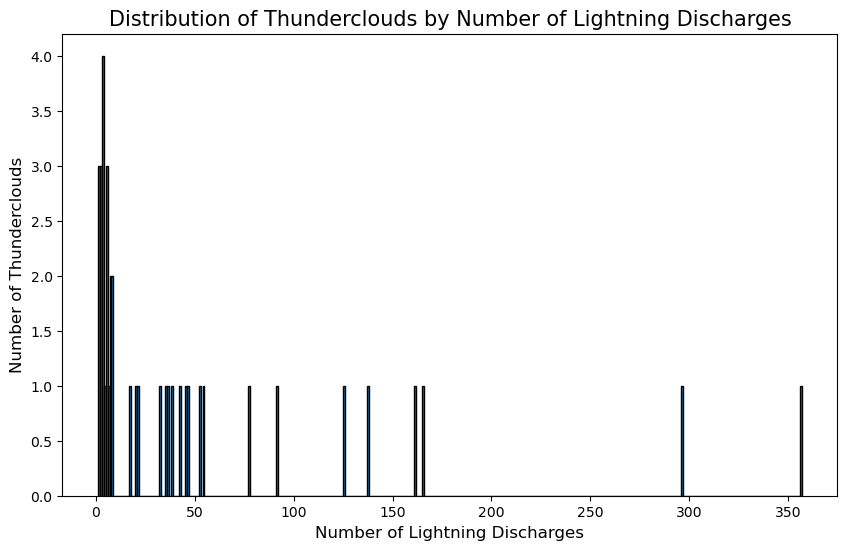

In [18]:
import matplotlib.pyplot as plt

# Create a histogram of lightning discharges per cloud
plt.figure(figsize=(10, 6))
plt.hist(lightning_counts, bins=range(1, lightning_counts.max() + 1), edgecolor='black')

# Add titles and labels
plt.title('Distribution of Thunderclouds by Number of Lightning Discharges', fontsize=15)
plt.xlabel('Number of Lightning Discharges', fontsize=12)
plt.ylabel('Number of Thunderclouds', fontsize=12)

# Show the plot
plt.show()

In [ ]:
import seaborn as sns

# Create a bar plot of the counts of lightning discharges per cloud
plt.figure(figsize=(12, 6))
sns.countplot(x=lightning_counts, palette='Blues')

# Add titles and labels
plt.title('Distribution of Thunderclouds by Number of Lightning Discharges', fontsize=15)
plt.xlabel('Number of Lightning Discharges', fontsize=12)
plt.ylabel('Number of Thunderclouds', fontsize=12)

# Show the plot
plt.show()

Typical clouds only - not too high and not too low lightning rate

In [ ]:
# Group by 'Cloud_Number' and count the lightning discharges per cloud
lightning_counts = df_raw.groupby('Cloud_Number').size()

# Sort the counts to get a sense of distribution
lightning_counts_sorted = lightning_counts.sort_values()

# Calculate the 10th and 90th percentiles for the counts
lower_bound = lightning_counts_sorted.quantile(0.10)
upper_bound = lightning_counts_sorted.quantile(0.90)

# Filter clouds to keep only those with counts between the 10th and 90th percentiles
filtered_lightning_counts = lightning_counts_sorted[
    (lightning_counts_sorted > lower_bound) & (lightning_counts_sorted < upper_bound)
]

# View the filtered lightning counts
print(filtered_lightning_counts.head())

# Optionally, plot the distribution for visual understanding
filtered_lightning_counts.hist(bins=20)  # Adjust the bins as needed for better visualization


Static plot

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of the filtered lightning counts
plt.figure(figsize=(10, 6))
plt.hist(filtered_lightning_counts, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Lightning Discharges (Filtered 80%)', fontsize=16)
plt.xlabel('Number of Lightning Discharges', fontsize=14)
plt.ylabel('Number of Clouds', fontsize=14)

# Show the plot
plt.show()


Interactive plot

In [ ]:
import plotly.express as px

# Create an interactive histogram of the filtered lightning counts
fig = px.histogram(
    filtered_lightning_counts,
    nbins=20,  # Adjust the number of bins as necessary
    title='Distribution of Lightning Discharges (Filtered 80%)',
    labels={'value': 'Number of Lightning Discharges', 'count': 'Number of Clouds'},
    height=600, width=800
)

# Add axis labels
fig.update_layout(
    xaxis_title="Number of Lightning Discharges",
    yaxis_title="Number of Clouds",
    bargap=0.1  # Adjust bar gap
)

# Show the plot
fig.show()


## Choosing clouds in the region around Station

In [9]:
station_latitude = 40.4713
station_longitude = 44.1819
station_tolerance = 5  # Adjustable for any other degree range

# Define the bounding box
min_latitude = station_latitude - station_tolerance
max_latitude = station_latitude + station_tolerance
min_longitude = station_longitude - station_tolerance
max_longitude = station_longitude + station_tolerance

In [10]:
cloud_groups = df_raw.groupby('Cloud_Number')

# Define a function to check if a cloud is always within the bounding box
def is_always_in_box(cloud_df):
    return ((cloud_df['Latitude'] >= min_latitude) & (cloud_df['Latitude'] <= max_latitude) &
            (cloud_df['Longitude'] >= min_longitude) & (cloud_df['Longitude'] <= max_longitude)).all()

# Filter the clouds: keep only clouds that are always within the bounding box
filtered_clouds = cloud_groups.filter(is_always_in_box)

In [17]:
# Total number of unique clouds in the initial DataFrame
total_clouds = df_raw['Cloud_Number'].nunique()

# Number of unique clouds in the filtered data
filtered_cloud_count = filtered_clouds['Cloud_Number'].nunique()

# Calculate the number of excluded clouds
excluded_cloud_count = total_clouds - filtered_cloud_count

# Output the results to the console
print(f"Total number of clouds in the initial Parquet: {total_clouds}")
print(f"Number of clouds within the rectangle (filtered): {filtered_cloud_count}")
print(f"Number of clouds excluded (not always in the rectangle): {excluded_cloud_count}")

Total number of clouds in the initial Parquet: 5991
Number of clouds within the rectangle (filtered): 37
Number of clouds excluded (not always in the rectangle): 5954


Wrapping the above to a function for getting clouds just within the Station region from the global dataset:

In [21]:
def make_filtered_clouds(df_raw, station_latitude, station_longitude, region_half_size):
    """
    Filters the clouds in the DataFrame, keeping only those clouds that are always within the bounding box
    defined by station coordinates and the frame_half_size tolerance.

    Parameters:
    - df_raw: The raw DataFrame containing the cloud data, including 'Latitude', 'Longitude', and 'Cloud_Number'.
    - station_latitude: The latitude of the station.
    - station_longitude: The longitude of the station.
    - frame_half_size: The half-size (in degrees) of the bounding box around the station within which clouds are kept.

    Returns:
    - filtered_clouds: A DataFrame containing clouds that are always within the bounding box.
    """

    # Define the bounding box based on station coordinates and frame_half_size
    min_latitude = station_latitude - region_half_size
    max_latitude = station_latitude + region_half_size
    min_longitude = station_longitude - region_half_size
    max_longitude = station_longitude + region_half_size

    # Group the data by 'Cloud_Number'
    cloud_groups = df_raw.groupby('Cloud_Number')

    # Define a function to check if a cloud is always within the bounding box
    def is_always_in_box(cloud_df):
        return ((cloud_df['Latitude'] >= min_latitude) & (cloud_df['Latitude'] <= max_latitude) &
                (cloud_df['Longitude'] >= min_longitude) & (cloud_df['Longitude'] <= max_longitude)).all()

    # Filter the clouds: keep only clouds that are always within the bounding box
    filtered_clouds = cloud_groups.filter(is_always_in_box)

    # Calculate total clouds and filtered clouds
    total_clouds = df_raw['Cloud_Number'].nunique()
    filtered_cloud_count = filtered_clouds['Cloud_Number'].nunique()
    excluded_cloud_count = total_clouds - filtered_cloud_count

    # Output the results to the console
    print(f"Total number of clouds in the initial DataFrame: {total_clouds}")
    print(f"Number of clouds within the rectangle (filtered): {filtered_cloud_count}")
    print(f"Number of clouds excluded (not always in the rectangle): {excluded_cloud_count}")

    return filtered_clouds


In [22]:
filtered_clouds = make_filtered_clouds(df_raw, station_latitude, station_longitude, region_half_size=5)

Total number of clouds in the initial DataFrame: 5991
Number of clouds within the rectangle (filtered): 37
Number of clouds excluded (not always in the rectangle): 5954


In [25]:
plot_cloud_centers_with_station(filtered_clouds, station_latitude, station_longitude, frame_half_size=10, rectangle_half_size=5)